## 4<sup>th</sup> of May, 2020
## Benjamin Adam Catching
## Coronavirus Simulation
## Andino Lab

From Friday's discussion with Simone Bianco it is recommended to update the figures. The current figure 1 is a bit messy, reducing the multiple trajectories to a mean and standard deviation for each time point will illustrate transmission better. Also the number of current infections per day is not standard for epidemiology. This trajectory will be replaced by number of new cases per day, so each day will count the number of new cases and assign it in a step-wise manner. The mean and standard deviation will be calculated for this trajectory as well.  

For figure 2, the graphs of subfigure A and D are good, they should be scooted up to A and B, respectively. For the subfigure C there should be a sensitivity analysis, where the % of masks is one axis, the peak number of infected is another axis, and the coloring and size of the marker represent the asymptomatic percentage and social distancing percentage, respectfully.

Raw Text:  
fig 1  
-mean and variance instead of individual trajectories  
-incidence instead of total number of cases, new cases per day  
-size and position of peak (x-axis % wearing masks, y-axis peak number)   

fig 2  
-What percent is symptomatic vs. asymp  
-What percentage are infected  
-Masks only on symptomatic individuals, certain probabilities for 
-Sensitivity analysis asymptomatic 25, 75%, two more sets (run over the weekend)  

Discussion  
-Papers needed in terms of epidemiology  
-Frame as epidemilogical perspective  

-To Do  
-Re do the figure and re-run the simulation with different mask values, count number of new infected per time step  
-Rework model  
-3:45-4:30 meeting on Monday  
-Ask David to get some epidemilogical papers for discussion  

In [1]:
# Import python packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import matplotlib.ticker as ticker

In [13]:
# Make sure all dataframes have the same time
# g = mask %, h = shelter %, i = iteration #
for g in range(5):
    for h in range(5):
        for i in range(10):
            run_name = 'mask_per_' + str(g*2) + '0_shelter_' + str(h*2) + \
            '0_asymp_5.0_striter_' + str(i) + '.csv'
            dataname = '../../data/var_asympt_run/' + run_name
            f = open(dataname, 'r+')
            temp_lines = f.readlines()
            temp_line = temp_lines[-1]
            line_parts = temp_line.split(',')
            for i in range(int(line_parts[0]), final_time):
                new_line = str(i) + ',' + ','.join(line_parts[1:])
                f.write(new_line)
            f.close()

In [14]:
# First redo figure 1, import the data files

# Test file for import
new_dir = '../../data/var_asympt_run/'
test_filename = 'mask_per_00_shelter_00_asymp_5.0_striter_0.csv'
test_file = new_dir + test_filename

# Test import 
test_df = pd.read_csv(test_file, header=1)
test_df.tail()

,time,percent sheltering,percent wearing masks,infected,exposed,recovered,infected with mask,susceptible with mask,infected symptomatic,infected asymptomatic,new infected,percent asymptomatic
2492,2492,0.0,0.0,0,0,480,0,0,0,0,0,0
2493,2493,0.0,0.0,0,0,480,0,0,0,0,0,0
2494,2494,0.0,0.0,0,0,480,0,0,0,0,0,0
2495,2495,0.0,0.0,0,0,480,0,0,0,0,0,0
2496,2495,0.0,0.0,0,0,480,0,0,0,0,0,0


It seems the data was not saved correctly. The percent asymptomatic value saved instead the percent wearing masks. The percent becoming asymptomatic is then only in the filename, '...asympt_5.0...' corresponding to 50% chance of being asymptomatic.  

The value for the day should be a new 

In [15]:
# Way to get day value from time value
days = test_df['time'].values // 24
print(days)

[  0   0   0 ... 103 103 103]


In [16]:
# Number of days to test
num_hours = test_df['time'].values.max()
num_days = num_hours // 24

# Number of new infections per day
new_infect = np.zeros(len(days))
cumul_infect = np.zeros(len(days))
new_total = 0
for i in range(len(days)):
    if i % 24 == 0:
        temp = sum(test_df['new infected'].iloc[i:i+24].values)
        new_total += temp
    new_infect[i] = temp
    cumul_infect[i] = new_total

In [17]:
for i in range(len(days)):
    print(days[i], new_infect[i])
set(days)

0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
0 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
1 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
2 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
3 0.0
4 0.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
4 1.0
5 1.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
5 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.0
6 0.

53 0.0
53 0.0
53 0.0
53 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
54 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
55 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
56 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
57 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
58 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0
59 0.0

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103}

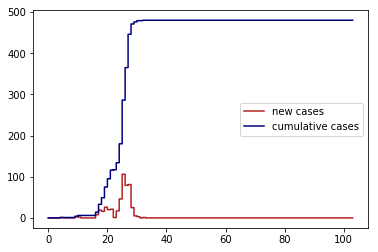

In [18]:
_ = plt.plot(days, new_infect, color='firebrick', label='new cases')
_ = plt.plot(days, cumul_infect, color='navy', label='cumulative cases')
_ = plt.legend()
plt.show()

In [19]:
# Assign these new values
test_df['day'] = days
test_df['new cases'] = new_infect
test_df['total cases'] = cumul_infect

In [20]:
test_df.head()

,time,percent sheltering,percent wearing masks,infected,exposed,recovered,infected with mask,susceptible with mask,infected symptomatic,infected asymptomatic,new infected,percent asymptomatic,day,new cases,total cases
0,1,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
1,2,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
2,3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
3,4,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
4,5,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0


In [21]:
# Take simulation dataframe and return daily summary values
def sum_vals(df):
    """
    Take dataframe and add day, new infected, and cumulative 
    infected columns
    """
    
    # Define day values
    temp_days = df['time'].values // 24
    
    # Number of new infections per day
    new_infect = np.zeros(len(temp_days))
    cumul_infect = np.zeros(len(temp_days))
    new_total = 0
    for i in range(len(temp_days)):
        if i % 24 == 0:
            temp = sum(df['new infected'].iloc[i:i+24].values)
            new_total += temp
        new_infect[i] = temp
        cumul_infect[i] = new_total
    
    df['day'] = temp_days
    df['daily newly infected'] = new_infect
    df['total infected'] = cumul_infect
    temp = 0

In [22]:
# Test file for import
new_dir = '../../data/var_asympt_run/'
test_filename = 'mask_per_00_shelter_00_asymp_5.0_striter_1.csv'
test_file = new_dir + test_filename

test_df = pd.read_csv(test_file, header=1)
test_df.tail()

,time,percent sheltering,percent wearing masks,infected,exposed,recovered,infected with mask,susceptible with mask,infected symptomatic,infected asymptomatic,new infected,percent asymptomatic
2492,2492,0.0,0.0,0,0,480,0,0,0,0,0,0
2493,2493,0.0,0.0,0,0,480,0,0,0,0,0,0
2494,2494,0.0,0.0,0,0,480,0,0,0,0,0,0
2495,2495,0.0,0.0,0,0,480,0,0,0,0,0,0
2496,2495,0.0,0.0,0,0,480,0,0,0,0,0,0


In [23]:
sum_vals(test_df)
test_df.head()

,time,percent sheltering,percent wearing masks,infected,exposed,recovered,infected with mask,susceptible with mask,infected symptomatic,infected asymptomatic,new infected,percent asymptomatic,day,daily newly infected,total infected
0,1,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
1,2,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
2,3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
3,4,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
4,5,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0


In [24]:
# Write to new dataframe
temp = test_df.to_csv(new_dir + 'test.csv', sep=',', index_label=False)

In [25]:
new_test = pd.read_csv(new_dir + 'test.csv')
new_test.head()

,time,percent sheltering,percent wearing masks,infected,exposed,recovered,infected with mask,susceptible with mask,infected symptomatic,infected asymptomatic,new infected,percent asymptomatic,day,daily newly infected,total infected
0,1,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
1,2,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
2,3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
3,4,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0
4,5,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0.0,0.0


In [26]:
new_dir = '../../data/var_asympt_run/'

# Extract the longest number of steps
max_steps = 0
# Import all files and add the new columns
for g in range(5):
    for h in range(5):
        for i in range(10):
            # g = mask %, h = shelter %, i = iteration #
            temp_fn = 'mask_per_' + str(g*2) + '0_shelter_' + str(h*2) + \
            '0_asymp_5.0_striter_' + str(i) + '.csv'
            
            # Read in file
            temp_file = new_dir + temp_fn
            temp_df = pd.read_csv(temp_file, header=1)
            
            print(temp_file)
            # Get the max value of the time
            time_values = temp_df['time'].values
            temp_max_time = time_values[-1]
            # Check is the value is greater
            if temp_max_time > max_steps:
                max_steps = temp_max_time
            
            # Add columns to dataframe
            sum_vals(temp_df)
            
            # Write new dataframe to file
            temp_df.to_csv(new_dir + temp_fn, sep=',', 
                           index_label=False)
print(max_steps)

../../data/var_asympt_run/mask_per_00_shelter_00_asymp_5.0_striter_0.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_5.0_striter_1.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_5.0_striter_2.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_5.0_striter_3.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_5.0_striter_4.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_5.0_striter_5.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_5.0_striter_6.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_5.0_striter_7.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_5.0_striter_8.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_5.0_striter_9.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_5.0_striter_0.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_5.0_striter_1.csv
../../data/var_asympt_run/mask_per_00_shelter_20_asymp_5.0_striter_2.csv
../../data/var_asympt_run/mask_per_00_shelter_20_as

../../data/var_asympt_run/mask_per_40_shelter_20_asymp_5.0_striter_7.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_5.0_striter_8.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_5.0_striter_9.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_5.0_striter_0.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_5.0_striter_1.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_5.0_striter_2.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_5.0_striter_3.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_5.0_striter_4.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_5.0_striter_5.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_5.0_striter_6.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_5.0_striter_7.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_5.0_striter_8.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_5.0_striter_9.csv
../../data/var_asympt_run/mask_per_40_shelter_60_as

../../data/var_asympt_run/mask_per_80_shelter_60_asymp_5.0_striter_1.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_5.0_striter_2.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_5.0_striter_3.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_5.0_striter_4.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_5.0_striter_5.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_5.0_striter_6.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_5.0_striter_7.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_5.0_striter_8.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_5.0_striter_9.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_5.0_striter_0.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_5.0_striter_1.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_5.0_striter_2.csv
../../data/var_asympt_run/mask_per_80_shelter_80_asymp_5.0_striter_3.csv
../../data/var_asympt_run/mask_per_80_shelter_80_as

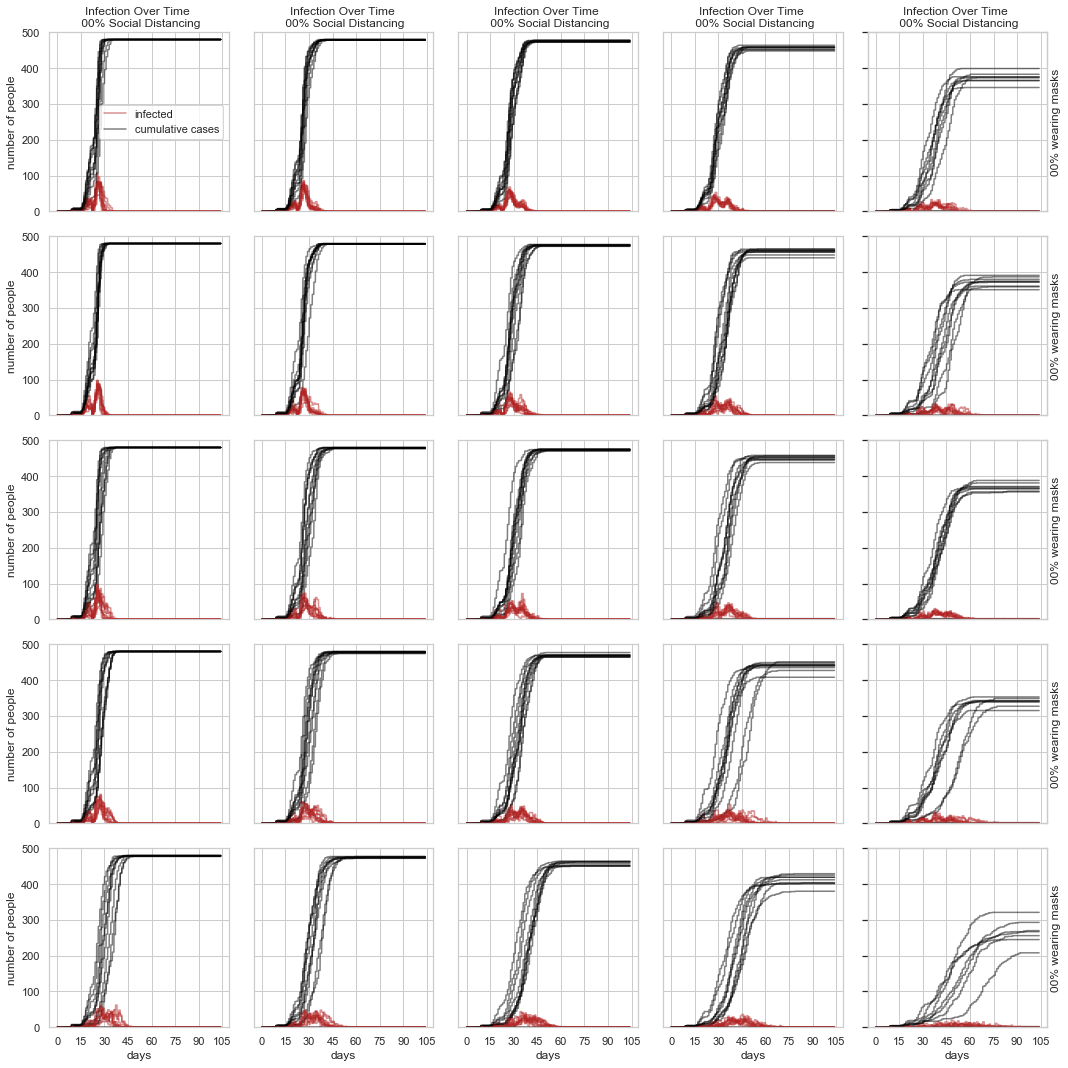

In [32]:
with sns.axes_style('whitegrid'):
    sns.set_context('notebook')
    fig, ax = plt.subplots(5, 5, figsize=(15, 15), sharey=True, sharex=True)
    for g in range(5):
        for h in range(5):
            for i in range(10):
                # g = mask %, h = shelter %, i = iteration #
                run_name = 'mask_per_' + str(g*2) + '0_shelter_' + str(h*2) + \
                '0_asymp_5.0_striter_' + str(i) + '.csv'
                dataname = '../../data/var_asympt_run/' + run_name
                temp_df = pd.read_csv(dataname)
                if h == 4:
                    _ = ax[h, g].set_xlabel('days')
                    _ = ax[h, g].plot(temp_df['time'], temp_df['daily newly infected'], 
                         color='firebrick', alpha=.5)
                    _ = ax[h, g].plot(temp_df['time'], temp_df['total infected'], color='black', 
                                       alpha=.5)
                elif h == 0:
                    _ = ax[h, g].set_title(f'Infection Over Time \n {h*2}0% Social Distancing')
                    if i == 0 and g == 0:
                        _ = ax[h, g].plot(temp_df['time'], temp_df['daily newly infected'], 
                                          color='firebrick', label='infected', alpha=.5)
                        _ = ax[h, g].plot(temp_df['time'], temp_df['total infected'], color='black', 
                                           label='cumulative cases', alpha=.5)
                        _ = ax[h, g].set_xticks(np.linspace(0, 3600, 11))
                        _ = ax[h, g].set_xticklabels([int(x) for x in np.linspace(0, 150, 11)])
                        _ = ax[h, g].set_ylim([0, 500])
                        _ = ax[0, 0].legend()
                    else:
                        _ = ax[h, g].plot(temp_df['time'], temp_df['daily newly infected'], 
                                          color='firebrick', alpha=.5)
                        _ = ax[h, g].plot(temp_df['time'], temp_df['total infected'], color='black', 
                                          alpha=.5)

                else:
                    _ = ax[h, g].plot(temp_df['time'], temp_df['daily newly infected'], 
                         color='firebrick', alpha=.5)
                    _ = ax[h, g].plot(temp_df['time'], temp_df['total infected'], color='black', 
                                       alpha=.5)
                if g == 0 and i == 0:
                    _ = ax[h, g].set_ylabel('number of people')

                if g == 4 and i == 0:
                    ax2 = ax[h, g].twinx()
                    ax2.set_ylabel(f'{i*2}0% wearing masks')
                    ax2.set_yticks([])
    fig.tight_layout()
    plt.savefig('../../large_mask_ten_samples.png', dpi=100)
    plt.show()

0
1
2
3
4


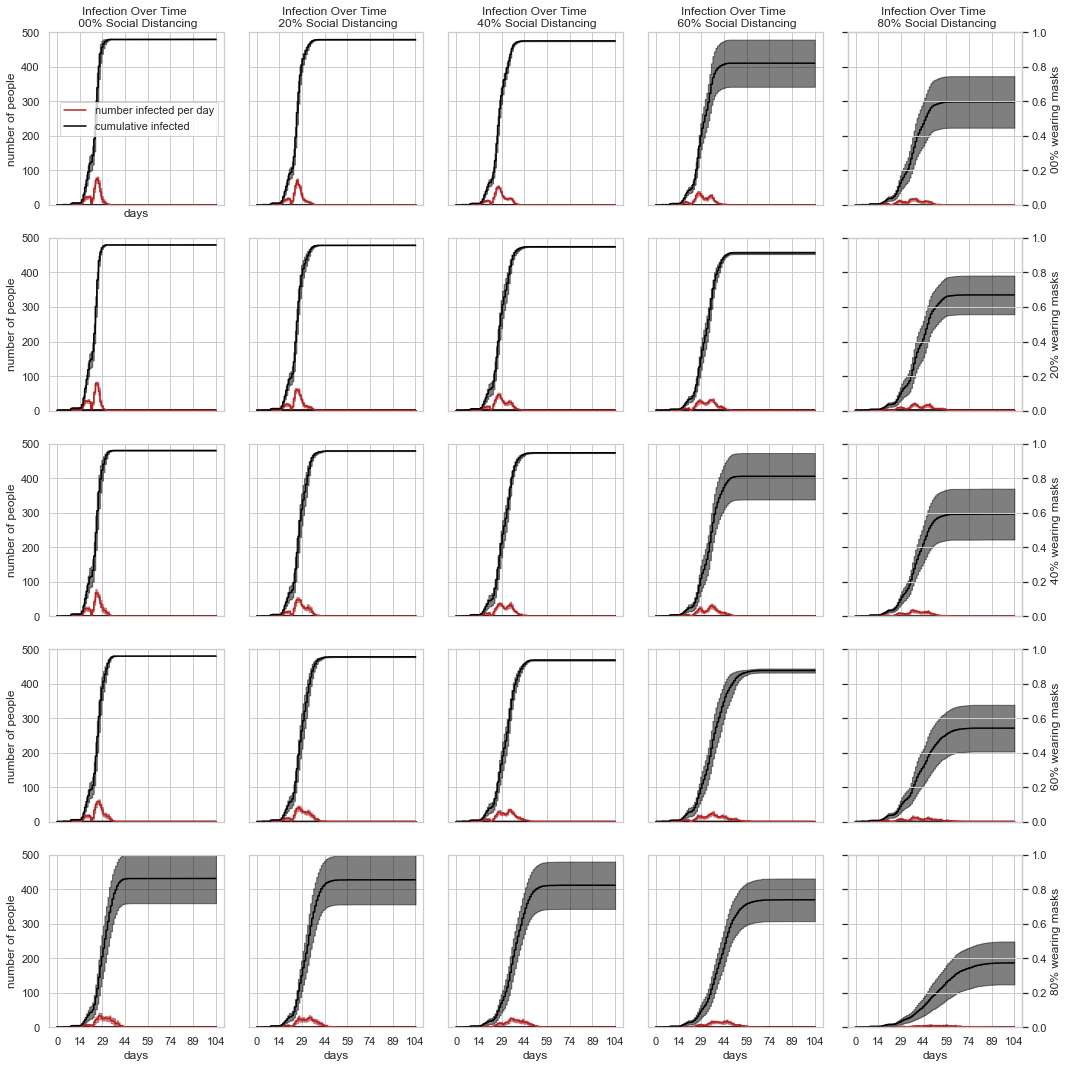

In [193]:
num_time_points = 2497
with sns.axes_style('whitegrid'):
    sns.set_context('notebook')
    fig, ax = plt.subplots(5, 5, figsize=(15, 15), sharey=True, sharex=True)
    for g in range(5):
        print(g)
        for h in range(5):
            # Array to store new infections
            new_infections = np.zeros((10, num_time_points))
            cumul_infections = np.zeros((10, num_time_points))
            for i in range(10):
                # g = mask %, h = shelter %, i = iteration #
                run_name = 'mask_per_' + str(g*2) + '0_shelter_' + \
                str(h*2) + '0_asymp_5.0_striter_' + str(i) + '.csv'
                
                dataname = '../../data/var_asympt_run/' + run_name
                temp_df = pd.read_csv(dataname)
                newly_infect_vals= temp_df['daily newly infected'].values
                cumul_vals = temp_df['total infected'].values
                for j in range(len(temp_df['time'])):
                    temp_new_infect = newly_infect_vals[j]
                    temp_cumul_infect = cumul_vals[j]
                    new_infections[i, j] = temp_new_infect
                    cumul_infections[i, j] = temp_cumul_infect

                # Mean of new infection 
                new_infect_mean = np.zeros(num_time_points)
                new_infect_std = np.zeros(num_time_points)
                cumul_infect_mean = np.zeros(num_time_points)
                cumul_infect_std = np.zeros(num_time_points)
                if i == 9:
                    for k in range(num_time_points):
                        new_infect_mean[k] = new_infections[:, k].mean()
                        new_infect_std[k] = new_infections[:, k].std()
                        cumul_infect_mean[k] = cumul_infections[:, k].mean()
                        cumul_infect_std[k] = cumul_infections[:, k].std()
                    time = np.linspace(1, num_time_points, num_time_points)
                    
                if h == 4 and i == 9:
                    _ = ax[h, g].set_xlabel('days')
                    _ = ax[h, g].fill_between(time, y2 = new_infect_mean + new_infect_std/2, 
                                                  y1 = new_infect_mean - new_infect_std/2, 
                                                  color = 'firebrick', alpha = .5)
                    _ = ax[h, g].plot(time, new_infect_mean, color='firebrick',
                                     label='number infected per day')
                    _ = ax[h, g].fill_between(time, y2 = cumul_infect_mean + cumul_infect_std/2,
                                             y1 = cumul_infect_mean - cumul_infect_std/2,
                                             color = 'black', alpha = .5)
                    _ = ax[h, g].plot(time, cumul_infect_mean, color='black',
                                     label='cumulative infected')
                elif h == 0 and i == 9:
                    _ = ax[h, g].set_title(f'Infection Over Time \n {g*2}0% Social Distancing')
                    if g == 0:
                        _ = ax[h, g].set_xlabel('days')
                        _ = ax[h, g].fill_between(time, y2 = new_infect_mean + new_infect_std/2, 
                                                  y1 = new_infect_mean - new_infect_std/2, 
                                                  color = 'firebrick', alpha = .5)
                        _ = ax[h, g].plot(time, new_infect_mean, color='firebrick',
                                         label='number infected per day')
                        _ = ax[h, g].fill_between(time, y2 = cumul_infect_mean + cumul_infect_std/2,
                                                 y1 = cumul_infect_mean - cumul_infect_std/2,
                                                 color = 'black', alpha = .5)
                        _ = ax[h, g].plot(time, cumul_infect_mean, color='black',
                                         label='cumulative infected')
                        _ = ax[h, g].set_xticks(np.linspace(0, 2496, 8))
                        _ = ax[h, g].set_xticklabels([int(x) for x in np.linspace(0, 104, 8)])
                        _ = ax[h, g].set_ylim([0, 500])
                        _ = ax[0, 0].legend()
                    else:
                        _ = ax[h, g].fill_between(time, y2 = new_infect_mean + new_infect_std/2, 
                                                  y1 = new_infect_mean - new_infect_std/2, 
                                                  color = 'firebrick', alpha = .5)
                        _ = ax[h, g].plot(time, new_infect_mean, color='firebrick')
                        _ = ax[h, g].fill_between(time, y2 = cumul_infect_mean + cumul_infect_std/2,
                                                 y1 = cumul_infect_mean - cumul_infect_std/2,
                                                 color = 'black', alpha = .5)
                        _ = ax[h, g].plot(time, cumul_infect_mean, color='black')

                else:
                    _ = ax[h, g].fill_between(time, y2 = new_infect_mean + new_infect_std/2, 
                                              y1 = new_infect_mean - new_infect_std/2, 
                                              color = 'firebrick', alpha = .5)
                    _ = ax[h, g].plot(time, new_infect_mean, color='firebrick')
                    _ = ax[h, g].fill_between(time, y2 = cumul_infect_mean + cumul_infect_std/2,
                                             y1 = cumul_infect_mean - cumul_infect_std/2,
                                             color = 'black', alpha = .5)
                    _ = ax[h, g].plot(time, cumul_infect_mean, color='black')
                if g == 4 and i == 9:
                    ax2 = ax[h, g].twinx()
                    ax2.set_ylabel(f'{h*2}0% wearing masks')
                if g == 0 and i == 0:
                    _ = ax[h, g].set_ylabel('number of people')
    fig.tight_layout()
    plt.savefig('../../large_mask_ten_samples_mean.png', dpi=100)
    plt.show()

In [78]:
new_infections.shape

(10, 2497)

In [114]:
# Function to find the day with half the number of cumulative infections
def half_infected(df):
    """
    From the dataframe of infection dynamics find infection halfway point
    """
    
    # Define the number of time points
    timepoints = len(df[['time']])
    # Get the cumulative infection time points
    c_infect = df['recovered'] + df['infected']
    all_infected = df[['infected']].values
    # Get the max number of infected
    max_infect = df['recovered'].values.max()
    # Get the final number of infected
    final_infect = c_infect.max()
    half_max = max_infect / 2
    # Iterate over time points
    for i, infected in enumerate(c_infect):
        if infected == half_max:
            peak_infect = all_infected[i]
            return [i, final_infect, peak_infect]
        if infected < half_max:
            if c_infect[i + 1] > half_max:
                peak_infect = all_infected[i]
                return [i, final_infect, peak_infect]

In [189]:
half_max_time = np.zeros((5, 5, 10))
max_num = np.zeros((5, 5, 10))
peak_num = np.zeros((5, 5, 10))
no_spread = np.zeros((5, 5, 10))
for i in range(10):
    for g in range(5):
        for h in range(5):
            # Name the datafile
            run_name = 'mask_per_' + str(g*2) + '0_shelter_' + \
            str(h*2) + '0_asymp_5.0_striter_' + str(i) + '.csv'

            dataname = '../../data/var_asympt_run/' + run_name
            temp_df = pd.read_csv(dataname)
            test_half_max = half_infected(temp_df)
            half_max_time[g, h, i] = test_half_max[0] / 24
            max_num[g, h, i] = test_half_max[2]
            peak_num[g, h, i] = test_half_max[1]
            if test_half_max[2] <= 15:
                no_spread[g, h, i] = 1
print(peak_num)

[[[480. 480. 480. 480. 480. 480. 480. 480. 480. 480.]
  [480. 480. 480. 480. 480. 480. 480. 480. 480. 480.]
  [480. 480. 480. 480. 480. 480. 480. 480. 480. 480.]
  [480. 480. 480. 480. 480. 480. 480. 480. 480. 480.]
  [479. 477. 479. 480. 478.   1. 480. 478. 480. 479.]]

 [[480. 480. 478. 480. 479. 479. 479. 479. 480. 478.]
  [479. 479. 479. 479. 479. 480. 478. 480. 479. 478.]
  [478. 479. 480. 478. 479. 480. 476. 479. 480. 478.]
  [479. 480. 478. 475. 477. 480. 474. 477. 479. 479.]
  [475. 475. 477. 472. 472.   1. 477. 473. 475. 475.]]

 [[476. 478. 473. 474. 473. 477. 478. 475. 473. 477.]
  [474. 474. 477. 475. 472. 474. 473. 477. 476. 475.]
  [473. 475. 474. 473. 474. 470. 472. 476. 471. 475.]
  [466. 468. 468. 471. 464. 469. 467. 477. 470. 464.]
  [462. 450. 450. 452. 463.   1. 462. 464. 453. 458.]]

 [[448. 464. 451. 459. 452. 456.   1. 459. 458. 459.]
  [461. 461. 460. 456. 440. 464. 465. 456. 458. 448.]
  [  2. 446. 448. 438. 445. 458. 453. 454. 451. 457.]
  [427. 445. 435. 451.

In [190]:
half_max_time_mean = np.zeros((5, 5))
max_num_mean = np.zeros((5, 5))
peak_num_mean = np.zeros((5, 5))
no_spread_sum = np.zeros((5, 5))
for h in range(5):
    for i in range(5):
        temp = no_spread[h, i].sum()
        no_spread_sum[h, i] = temp
        # Weight of infections with spread
        weight = (10 - temp) / 10
        max_num_mean[h, i] = max_num[h, i].mean() * weight
        half_max_time_mean[h, i] = half_max_time[h, i].mean()
        peak_num_mean[h, i] = peak_num[h, i].mean() * weight 
max_num_mean = max_num_mean.astype(int)
half_max_time_mean = half_max_time_mean.astype(int)
peak_num_mean = peak_num_mean.astype(int)

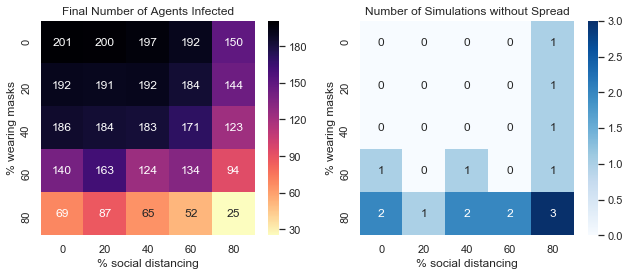

In [192]:
with sns.axes_style('white'):
    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    sns.heatmap(max_num_mean, fmt='d', cmap='magma_r', annot=True, ax=ax[0])
    _ = ax[0].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[0].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[0].set_ylabel('% wearing masks')
    _ = ax[0].set_xlabel('% social distancing')
    _ = ax[0].set_title('Final Number of Agents Infected')
    
    #sns.heatmap(half_max_time_mean, fmt="d", cmap='viridis', annot=True, ax=ax[1, 1])
    sns.heatmap(no_spread_sum, cmap='Blues', annot=True, ax=ax[1])
    _ = ax[1].set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1].set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax[1].set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1].set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax[1].set_ylabel('% wearing masks')
    _ = ax[1].set_xlabel('% social distancing')
    _ = ax[1].set_title('Number of Simulations without Spread')
    plt.tight_layout()
    
    
    plt.savefig('../../Summary_values.png', dpi=100)
    plt.show()

In [140]:
# Adjust dataframes of 25%and 75% asymptomatic
# g = mask %, h = shelter %, i = iteration #
for g in range(5):
    for h in range(5):
        for k in range(10):
            print(i)
            asympt_vals = ['2.5', '7.5']
            for j in asympt_vals:
                run_name = 'mask_per_' + str(g*2) + '0_shelter_' + str(h*2) + \
                '0_asymp_' + j + '_striter_' + str(k) + '.csv'
                dataname = '../../data/var_asympt_run/' + run_name
                print(k)
                print(dataname)
                f = open(dataname, 'r+')
                temp_lines = f.readlines()
                temp_line = temp_lines[-1]
                line_parts = temp_line.split(',')
                for i in range(int(line_parts[0]), final_time):
                    new_line = str(i) + ',' + ','.join(line_parts[1:])
                    f.write(new_line)
                f.close()

2495
0
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_striter_0.csv
0
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_7.5_striter_0.csv
2495
1
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_striter_1.csv
1
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_7.5_striter_1.csv
2495
2
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_striter_2.csv
2
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_7.5_striter_2.csv
2495
3
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_striter_3.csv
3
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_7.5_striter_3.csv
2495
4
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_striter_4.csv
4
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_7.5_striter_4.csv
2495
5
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_striter_5.csv
5
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_7.5_striter_5.csv
2495
6
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_stri

2495
3
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_2.5_striter_3.csv
3
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_7.5_striter_3.csv
2495
4
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_2.5_striter_4.csv
4
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_7.5_striter_4.csv
2495
5
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_2.5_striter_5.csv
5
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_7.5_striter_5.csv
2495
6
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_2.5_striter_6.csv
6
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_7.5_striter_6.csv
2495
7
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_2.5_striter_7.csv
7
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_7.5_striter_7.csv
2495
8
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_2.5_striter_8.csv
8
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_7.5_striter_8.csv
2495
9
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_2.5_stri

6
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_7.5_striter_6.csv
2495
7
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_2.5_striter_7.csv
7
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_7.5_striter_7.csv
2495
8
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_2.5_striter_8.csv
8
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_7.5_striter_8.csv
2495
9
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_2.5_striter_9.csv
9
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_7.5_striter_9.csv
2495
0
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_2.5_striter_0.csv
0
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_7.5_striter_0.csv
2495
1
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_2.5_striter_1.csv
1
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_7.5_striter_1.csv
2495
2
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_2.5_striter_2.csv
2
../../data/var_asympt_run/mask_per_40_shelter_60_asymp_7.5_striter_2

2495
7
../../data/var_asympt_run/mask_per_60_shelter_60_asymp_2.5_striter_7.csv
7
../../data/var_asympt_run/mask_per_60_shelter_60_asymp_7.5_striter_7.csv
2495
8
../../data/var_asympt_run/mask_per_60_shelter_60_asymp_2.5_striter_8.csv
8
../../data/var_asympt_run/mask_per_60_shelter_60_asymp_7.5_striter_8.csv
2495
9
../../data/var_asympt_run/mask_per_60_shelter_60_asymp_2.5_striter_9.csv
9
../../data/var_asympt_run/mask_per_60_shelter_60_asymp_7.5_striter_9.csv
2495
0
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_2.5_striter_0.csv
0
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_7.5_striter_0.csv
2495
1
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_2.5_striter_1.csv
1
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_7.5_striter_1.csv
2495
2
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_2.5_striter_2.csv
2
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_7.5_striter_2.csv
2495
3
../../data/var_asympt_run/mask_per_60_shelter_80_asymp_2.5_stri

In [143]:
new_dir = '../../data/var_asympt_run/'

# Extract the longest number of steps
max_steps = 0
# Import all files and add the new columns
for g in range(5):
    for h in range(5):
        for k in range(10):
            for j in asympt_vals:
                # g = mask %, h = shelter %, i = iteration #
                temp_fn = 'mask_per_' + str(g*2) + '0_shelter_' + str(h*2) + \
                '0_asymp_' + j + '_striter_' + str(k) + '.csv'

                # Read in file
                temp_file = new_dir + temp_fn
                temp_df = pd.read_csv(temp_file, header=1)

                print(temp_file)
                # Get the max value of the time
                time_values = temp_df['time'].values
                temp_max_time = time_values[-1]
                # Check is the value is greater
                if temp_max_time > max_steps:
                    max_steps = temp_max_time

                # Add columns to dataframe
                sum_vals(temp_df)

                # Write new dataframe to file
                temp_df.to_csv(new_dir + temp_fn, sep=',', 
                               index_label=False)

../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_striter_0.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_7.5_striter_0.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_striter_1.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_7.5_striter_1.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_striter_2.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_7.5_striter_2.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_striter_3.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_7.5_striter_3.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_striter_4.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_7.5_striter_4.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_striter_5.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_7.5_striter_5.csv
../../data/var_asympt_run/mask_per_00_shelter_00_asymp_2.5_striter_6.csv
../../data/var_asympt_run/mask_per_00_shelter_00_as

../../data/var_asympt_run/mask_per_20_shelter_00_asymp_7.5_striter_8.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_2.5_striter_9.csv
../../data/var_asympt_run/mask_per_20_shelter_00_asymp_7.5_striter_9.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_2.5_striter_0.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_7.5_striter_0.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_2.5_striter_1.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_7.5_striter_1.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_2.5_striter_2.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_7.5_striter_2.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_2.5_striter_3.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_7.5_striter_3.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_2.5_striter_4.csv
../../data/var_asympt_run/mask_per_20_shelter_20_asymp_7.5_striter_4.csv
../../data/var_asympt_run/mask_per_20_shelter_20_as

../../data/var_asympt_run/mask_per_40_shelter_20_asymp_7.5_striter_6.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_2.5_striter_7.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_7.5_striter_7.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_2.5_striter_8.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_7.5_striter_8.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_2.5_striter_9.csv
../../data/var_asympt_run/mask_per_40_shelter_20_asymp_7.5_striter_9.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_2.5_striter_0.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_7.5_striter_0.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_2.5_striter_1.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_7.5_striter_1.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_2.5_striter_2.csv
../../data/var_asympt_run/mask_per_40_shelter_40_asymp_7.5_striter_2.csv
../../data/var_asympt_run/mask_per_40_shelter_40_as

../../data/var_asympt_run/mask_per_60_shelter_40_asymp_7.5_striter_4.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_2.5_striter_5.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_7.5_striter_5.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_2.5_striter_6.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_7.5_striter_6.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_2.5_striter_7.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_7.5_striter_7.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_2.5_striter_8.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_7.5_striter_8.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_2.5_striter_9.csv
../../data/var_asympt_run/mask_per_60_shelter_40_asymp_7.5_striter_9.csv
../../data/var_asympt_run/mask_per_60_shelter_60_asymp_2.5_striter_0.csv
../../data/var_asympt_run/mask_per_60_shelter_60_asymp_7.5_striter_0.csv
../../data/var_asympt_run/mask_per_60_shelter_60_as

../../data/var_asympt_run/mask_per_80_shelter_60_asymp_2.5_striter_2.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_7.5_striter_2.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_2.5_striter_3.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_7.5_striter_3.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_2.5_striter_4.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_7.5_striter_4.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_2.5_striter_5.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_7.5_striter_5.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_2.5_striter_6.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_7.5_striter_6.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_2.5_striter_7.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_7.5_striter_7.csv
../../data/var_asympt_run/mask_per_80_shelter_60_asymp_2.5_striter_8.csv
../../data/var_asympt_run/mask_per_80_shelter_60_as

In [265]:
# Create the data frame
summary_df = [['% wearing masks', '% social distancing', '% asymptomatic', 'peak number of infected' , 'halfway point']]
# Iterate over % wearing masks
for g in range(5):
    # Iterate over % social distancing
    for h in range(5):
        # Iterate over the replicates
        for i in range(10):
            # Iterate over the % asymptomatic
            for j in range(3):
                asymp = str(2.5 * (j+1))
                # Get the name of the file
                run_name = 'mask_per_' + str(g*2) + '0_shelter_' + \
                str(h*2) + '0_asymp_' + asymp + '_striter_' + str(i) + '.csv'
                dataname = '../../data/var_asympt_run/' + run_name
                # Import as dataframe
                temp_df = pd.read_csv(dataname)
                
                # Get the peak number of infected
                test_half_max = half_infected(temp_df)
                peak_num = test_half_max[2]
                half_point = test_half_max[0] / 24
                
                # Test array of values
                temp_array = [g*20, h*20, 25*(j+1), peak_num, half_point]
                summary_df.append(temp_array)

In [267]:
temp_header = ['% wearing masks', '% social distancing', 
               '% asymptomatic', 'peak number of infected', 'halfway point']
sum_df = pd.DataFrame(summary_df[1:])  
sum_df.columns = temp_header
sum_df.head()

,% wearing masks,% social distancing,% asymptomatic,peak number of infected,halfway point
0,0,0,25,[201],25.541667
1,0,0,50,[201],25.541667
2,0,0,75,[201],25.541667
3,0,0,25,[206],24.291667
4,0,0,50,[206],24.291667


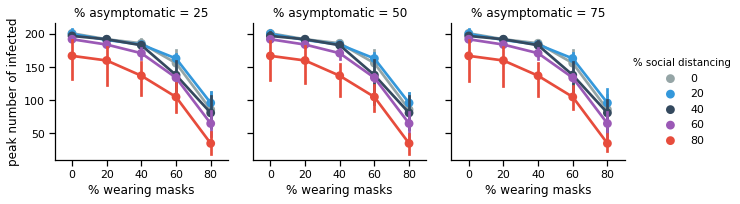

In [239]:
flatui = ["#95a5a6", "#3498db", "#34495e", "#9b59b6", "#e74c3c"]
sns.catplot(x="% wearing masks", y="peak number of infected", 
            col="% asymptomatic", hue="% social distancing",
            palette=flatui, kind="point", n_boot=100,
            height=3,data=sum_df)
plt.savefig('sensitivity_analysis.png', dpi=100)
plt.show()

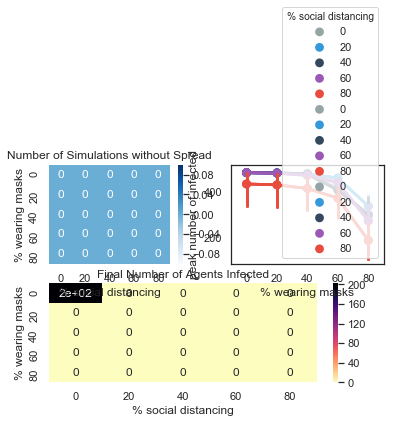

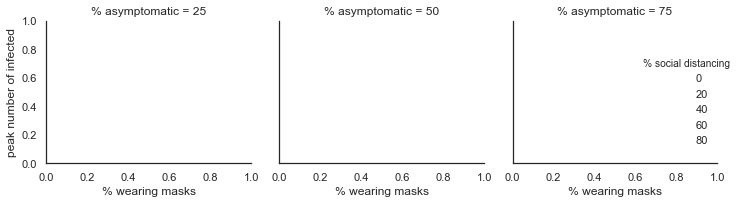

In [184]:
with sns.axes_style('white'):
    #fig, ax = plt.subplots(2, 2, figsize=(9, 8))
    ax1 = plt.subplot(212)
    sns.heatmap(max_num_mean, cmap='magma_r', annot=True, ax=ax1)
    _ = ax1.set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax1.set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax1.set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax1.set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax1.set_ylabel('% wearing masks')
    _ = ax1.set_xlabel('% social distancing')
    _ = ax1.set_title('Final Number of Agents Infected')
    
    #sns.heatmap(half_max_time_mean, fmt="d", cmap='viridis', annot=True, ax=ax[1, 1])
    ax2 = plt.subplot(221)
    sns.heatmap(no_spread_sum, cmap='Blues', annot=True, ax=ax2)
    _ = ax2.set_xticks(np.linspace(0.5, 4.5, 5))
    _ = ax2.set_yticks(np.linspace(0.5, 4.5, 5))
    _ = ax2.set_xticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax2.set_yticklabels(np.linspace(0, 80, 5).astype(int))
    _ = ax2.set_ylabel('% wearing masks')
    _ = ax2.set_xlabel('% social distancing')
    _ = ax2.set_title('Number of Simulations without Spread')
    
    ax3 = plt.subplot(222)
    sns.catplot(x="% wearing masks", y="peak number of infected", 
            col="% asymptomatic", hue="% social distancing",
            alpha=.25, palette=flatui,
            kind="point", ax=ax3,
            height=3, data=sum_df)
    
    plt.tight_layout()
    
    
    #plt.savefig('../../Summary_values.png', dpi=100)
    plt.show()

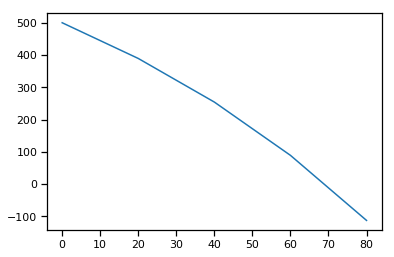

In [236]:
x = np.linspace(0, 80, 5)
plt.plot(x, 500 * (-np.exp(x /100) + 2))

In [240]:
sum_df.to_csv('../../summary_peak_infected.csv')

In [273]:
#extreme_sub = sum_df[sum_df["% wearing masks"] == (0, 80)]
mask = np.in1d(sum_df["% wearing masks"].values, [0, 80])
ex1 = sum_df[mask]
mask = np.in1d(ex1["% social distancing"].values, [0, 80])
extreme_sum = ex1[mask]
extreme_sum.head()

,% wearing masks,% social distancing,% asymptomatic,peak number of infected,halfway point
0,0,0,25,[201],25.541667
1,0,0,50,[201],25.541667
2,0,0,75,[201],25.541667
3,0,0,25,[206],24.291667
4,0,0,50,[206],24.291667


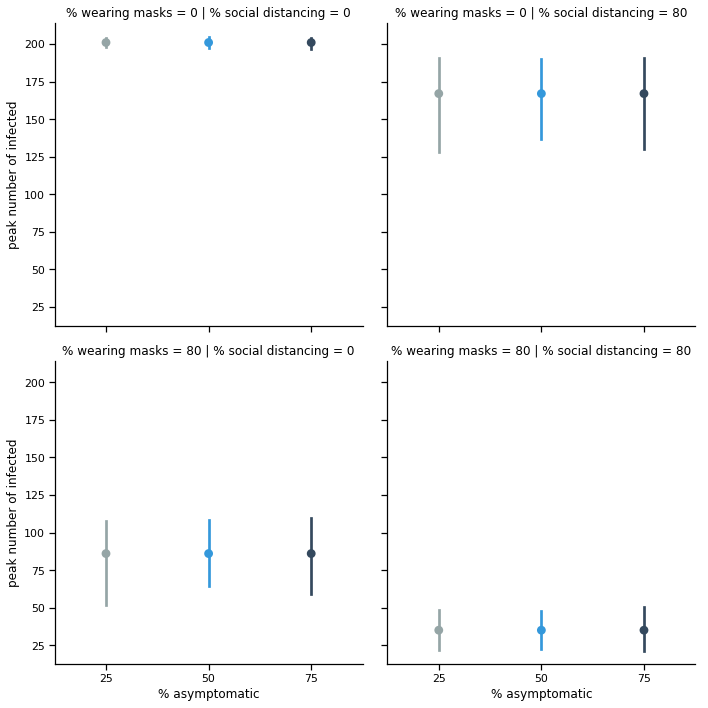

In [290]:
sns.catplot(x="% asymptomatic", y="peak number of infected", 
            col="% social distancing", row="% wearing masks",
            palette=flatui, kind="point", n_boot=100,
            width=3,data=extreme_sum)
plt.tight_layout()
plt.savefig('../../extreme.png', dpi=100)